<a href="https://colab.research.google.com/github/tjn012/test-2/blob/main/TestTwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Inspection

In [20]:
#import libraries
import pandas as pd
from google.colab import files

#Upload file
uploaded = files.upload()

#Load dataset
file_name = "Test2_dataset.xlsx" # replace with actual file name
df = pd.read_excel(file_name)

# Display first few rows of data set
df.head()

Saving Test2_dataset.xlsx to Test2_dataset (2).xlsx


Catalyst  Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  \
0         Ni−SiO2‑550                  0.15                   650        10.0   
1         Ni−SiO2‑750                  0.15                   650        10.0   
2   Ni/Sn0.2−SiO2‑550                  0.15                   650        10.0   
3   Ni/Sn0.2−SiO2‑750                  0.15                   650        10.0   
4  Ni/Sn0.05−SiO2‑550                  0.15                   650        10.0   

   Reaction Time  Pore Size  Pore Volume  Surface Area  \
0            0.5        4.7         0.58         476.0   
1            0.5        4.7         0.58         476.0   
2            0.5        5.2         0.58         455.0   
3            0.5        5.2         0.58         455.0   
4            0.5        4.8         0.82         599.0   

   H2-TPR Peak Temperature  Ni Particle Size  Ni Dispersion  \
0                    640.0               2.9            NaN   
1                    640.0               4.6            NaN   
2                    457.0               2.9            NaN   
3                    457.0               4.6            NaN   
4                    558.0               3.9            NaN   

   Modifier Electronegativity   GHSV  CH4 Conversion  CO2 Conversion  \
0                        1.96  60000            68.5            73.6   
1                        1.96  60000            66.9            72.4   
2                        1.96  60000            18.4            26.1   
3                        1.96  60000            14.6            19.9   
4                        1.96  60000            61.3            74.0   

   Syngas_Ratio  
0           0.7  
1           0.7  
2           1.0  
3           0.9  
4           0.7

In [27]:
# display summary stats
summary_statistics = df.describe()
print(summary_statistics)

       Ratio of CH4 in Feed  Reaction Temperature   Ni Loading  Reaction Time  \
count           1714.000000           1714.000000  1714.000000    1714.000000   
mean               0.369862            703.477246     9.337069      16.289964   
std                0.145389             86.778888     5.714180      22.749978   
min                0.050000            400.000000     0.300000       0.100000   
25%                0.250000            650.000000     5.000000       0.500000   
50%                0.400000            700.000000     9.670000       7.000000   
75%                0.500000            750.000000    10.220000      24.000000   
max                0.500000           1000.000000    60.000000     200.000000   

         Pore Size  Pore Volume  Surface Area  H2-TPR Peak Temperature  \
count  1714.000000  1714.000000   1714.000000              1714.000000   
mean     11.574593     0.402755    188.477548               632.727211   
std      10.576940     0.289400    174.102440   

Handling Missing Data

In [21]:
# check for missing data
missing_data = df.isnull().sum()

# display columns with missing data
missing_data[missing_data > 0]

Ni Dispersion     1056
CH4 Conversion      49
CO2 Conversion      77
Syngas_Ratio        76
dtype: int64

In [22]:
# example of imputing missing values with the mean
df['Ni Dispersion'].fillna(df['Ni Dispersion'].mean(), inplace=True)
df['CH4 Conversion'].fillna(df['CH4 Conversion'].mean(), inplace=True)
df['CO2 Conversion'].fillna(df['CO2 Conversion'].mean(), inplace=True)
df['Syngas_Ratio'].fillna(df['Syngas_Ratio'].mean(), inplace=True)

Data Transformation

In [23]:
# print the dataset's columns
print(df.columns)

# Check the data types to identify numeric columns
df.dtypes

Index(['Catalyst', 'Ratio of CH4 in Feed', 'Reaction Temperature',
       'Ni Loading', 'Reaction Time', 'Pore Size', 'Pore Volume',
       'Surface Area', 'H2-TPR Peak Temperature', 'Ni Particle Size',
       'Ni Dispersion', 'Modifier Electronegativity', 'GHSV', 'CH4 Conversion',
       'CO2 Conversion', 'Syngas_Ratio'],
      dtype='object')


Catalyst                       object
Ratio of CH4 in Feed          float64
Reaction Temperature            int64
Ni Loading                    float64
Reaction Time                 float64
Pore Size                     float64
Pore Volume                   float64
Surface Area                  float64
H2-TPR Peak Temperature       float64
Ni Particle Size              float64
Ni Dispersion                 float64
Modifier Electronegativity    float64
GHSV                            int64
CH4 Conversion                float64
CO2 Conversion                float64
Syngas_Ratio                  float64
dtype: object

In [24]:
# identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# display categorical columns
categorical_columns

Index(['Catalyst'], dtype='object')

In [25]:
# identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# display categorical columns
categorical_columns

# apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# display first few rows of encoded dataset
df_encoded.head()

Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  Reaction Time  \
0                  0.15                   650        10.0            0.5   
1                  0.15                   650        10.0            0.5   
2                  0.15                   650        10.0            0.5   
3                  0.15                   650        10.0            0.5   
4                  0.15                   650        10.0            0.5   

   Pore Size  Pore Volume  Surface Area  H2-TPR Peak Temperature  \
0        4.7         0.58         476.0                    640.0   
1        4.7         0.58         476.0                    640.0   
2        5.2         0.58         455.0                    457.0   
3        5.2         0.58         455.0                    457.0   
4        4.8         0.82         599.0                    558.0   

   Ni Particle Size  Ni Dispersion  ...  Catalyst_Y–2%Nd2O3  \
0               2.9       9.886117  ...               False   
1               4.6       9.886117  ...               False   
2               2.9       9.886117  ...               False   
3               4.6       9.886117  ...               False   
4               3.9       9.886117  ...               False   

   Catalyst_Y–2.5%Nd2O3  Catalyst_Y–3%Nd2O3  Catalyst_Y–3.5%Nd2O3  \
0                 False               False                 False   
1                 False               False                 False   
2                 False               False                 False   
3                 False               False                 False   
4                 False               False                 False   

   Catalyst_Y–4%Nd2O  Catalyst_Y–Ni/SBA-16-MgO  \
0              False                     False   
1              False                     False   
2              False                     False   
3              False                     False   
4              False                     False   

   Catalyst_Zr (10)-Ni(15)/ perlite  Catalyst_Zr (20)-Ni(15)/perlite,  \
0                             False                             False   
1                             False                             False   
2                             False                             False   
3                             False                             False   
4                             False                             False   

   Catalyst_ZrO2/10Ni/SBA-15  Catalyst_–Ni–La2O3  
0                      False               False  
1                      False               False  
2                      False               False  
3                      False               False  
4                      False               False  

[5 rows x 726 columns]

In [29]:
# Count the new columns created
new_columns_count = df_encoded.shape[1] - df.shape[1]

# Print the count
print("Number of new columns created:", new_columns_count)

Number of new columns created: 710


Summary Statistics

In [26]:
# display summary stats
summary_statistics = df.describe()
print(summary_statistics)

       Ratio of CH4 in Feed  Reaction Temperature   Ni Loading  Reaction Time  \
count           1714.000000           1714.000000  1714.000000    1714.000000   
mean               0.369862            703.477246     9.337069      16.289964   
std                0.145389             86.778888     5.714180      22.749978   
min                0.050000            400.000000     0.300000       0.100000   
25%                0.250000            650.000000     5.000000       0.500000   
50%                0.400000            700.000000     9.670000       7.000000   
75%                0.500000            750.000000    10.220000      24.000000   
max                0.500000           1000.000000    60.000000     200.000000   

         Pore Size  Pore Volume  Surface Area  H2-TPR Peak Temperature  \
count  1714.000000  1714.000000   1714.000000              1714.000000   
mean     11.574593     0.402755    188.477548               632.727211   
std      10.576940     0.289400    174.102440   

Data Visualization and Correlation Analysis

In [35]:
# assuming 'target_column' is the name of your target variable
X = df_encoded.drop('Reaction Temperature', axis=1)
y = df_encoded['Reaction Temperature']

# display the first few rows of X and y
X.head(), y.head()

(   Ratio of CH4 in Feed  Ni Loading  Reaction Time  Pore Size  Pore Volume  \
 0                  0.15        10.0            0.5        4.7         0.58   
 1                  0.15        10.0            0.5        4.7         0.58   
 2                  0.15        10.0            0.5        5.2         0.58   
 3                  0.15        10.0            0.5        5.2         0.58   
 4                  0.15        10.0            0.5        4.8         0.82   
 
    Surface Area  H2-TPR Peak Temperature  Ni Particle Size  Ni Dispersion  \
 0         476.0                    640.0               2.9       9.886117   
 1         476.0                    640.0               4.6       9.886117   
 2         455.0                    457.0               2.9       9.886117   
 3         455.0                    457.0               4.6       9.886117   
 4         599.0                    558.0               3.9       9.886117   
 
    Modifier Electronegativity  ...  Catalyst_Y–2%Nd2O

       Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  Reaction Time  \
count            861.000000            861.000000  861.000000     861.000000   
mean               0.379806            705.493612    8.639149       9.612509   
std                0.146570             78.094421    3.549552      11.460507   
min                0.050000            500.000000    0.500000       0.100000   
25%                0.300000            650.000000    5.000000       0.500000   
50%                0.470000            700.000000    9.940000       5.000000   
75%                0.500000            750.000000   10.220000      15.000000   
max                0.500000            900.000000   17.300000      48.000000   

        Pore Size  Pore Volume  Surface Area  H2-TPR Peak Temperature  \
count  861.000000   861.000000    861.000000               861.000000   
mean     9.559165     0.328017    145.157837               636.512165   
std      5.192220     0.202519     90.086415               1

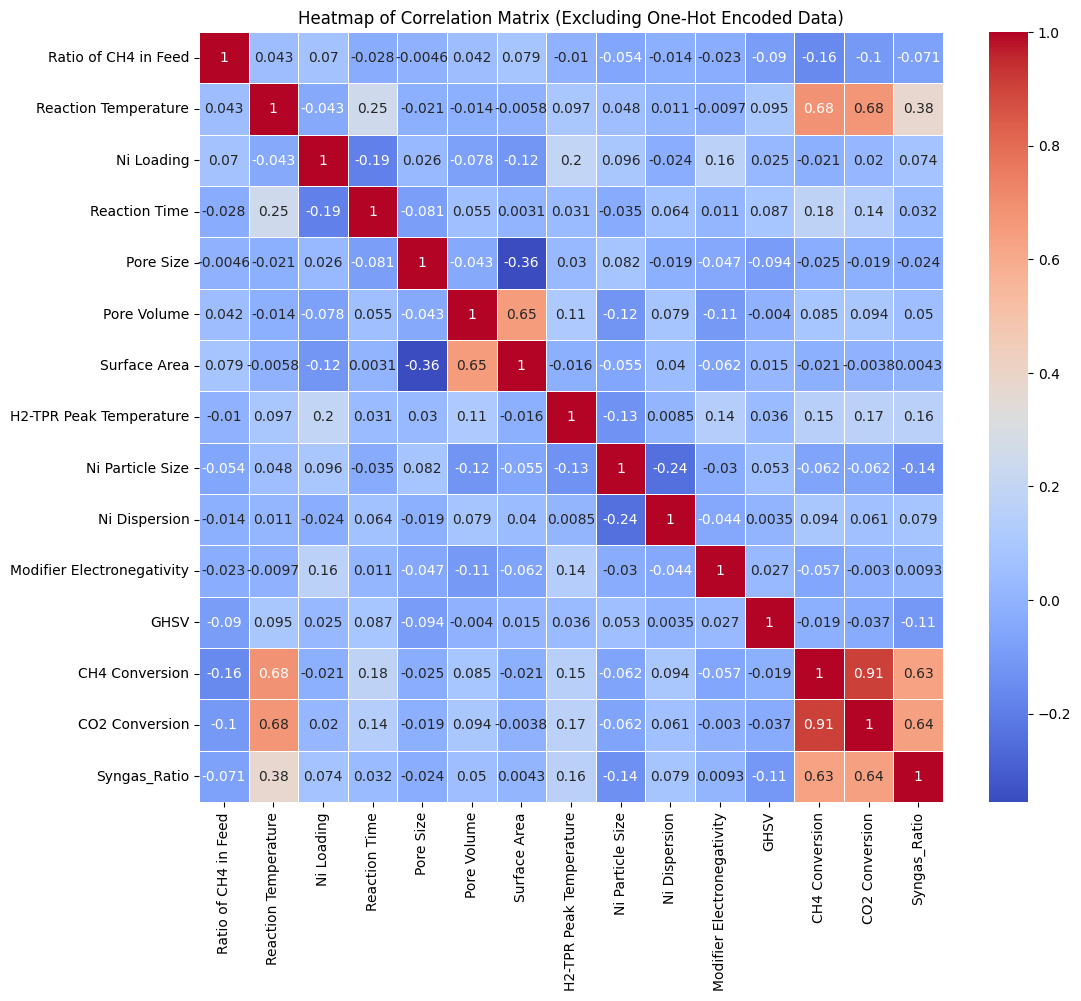

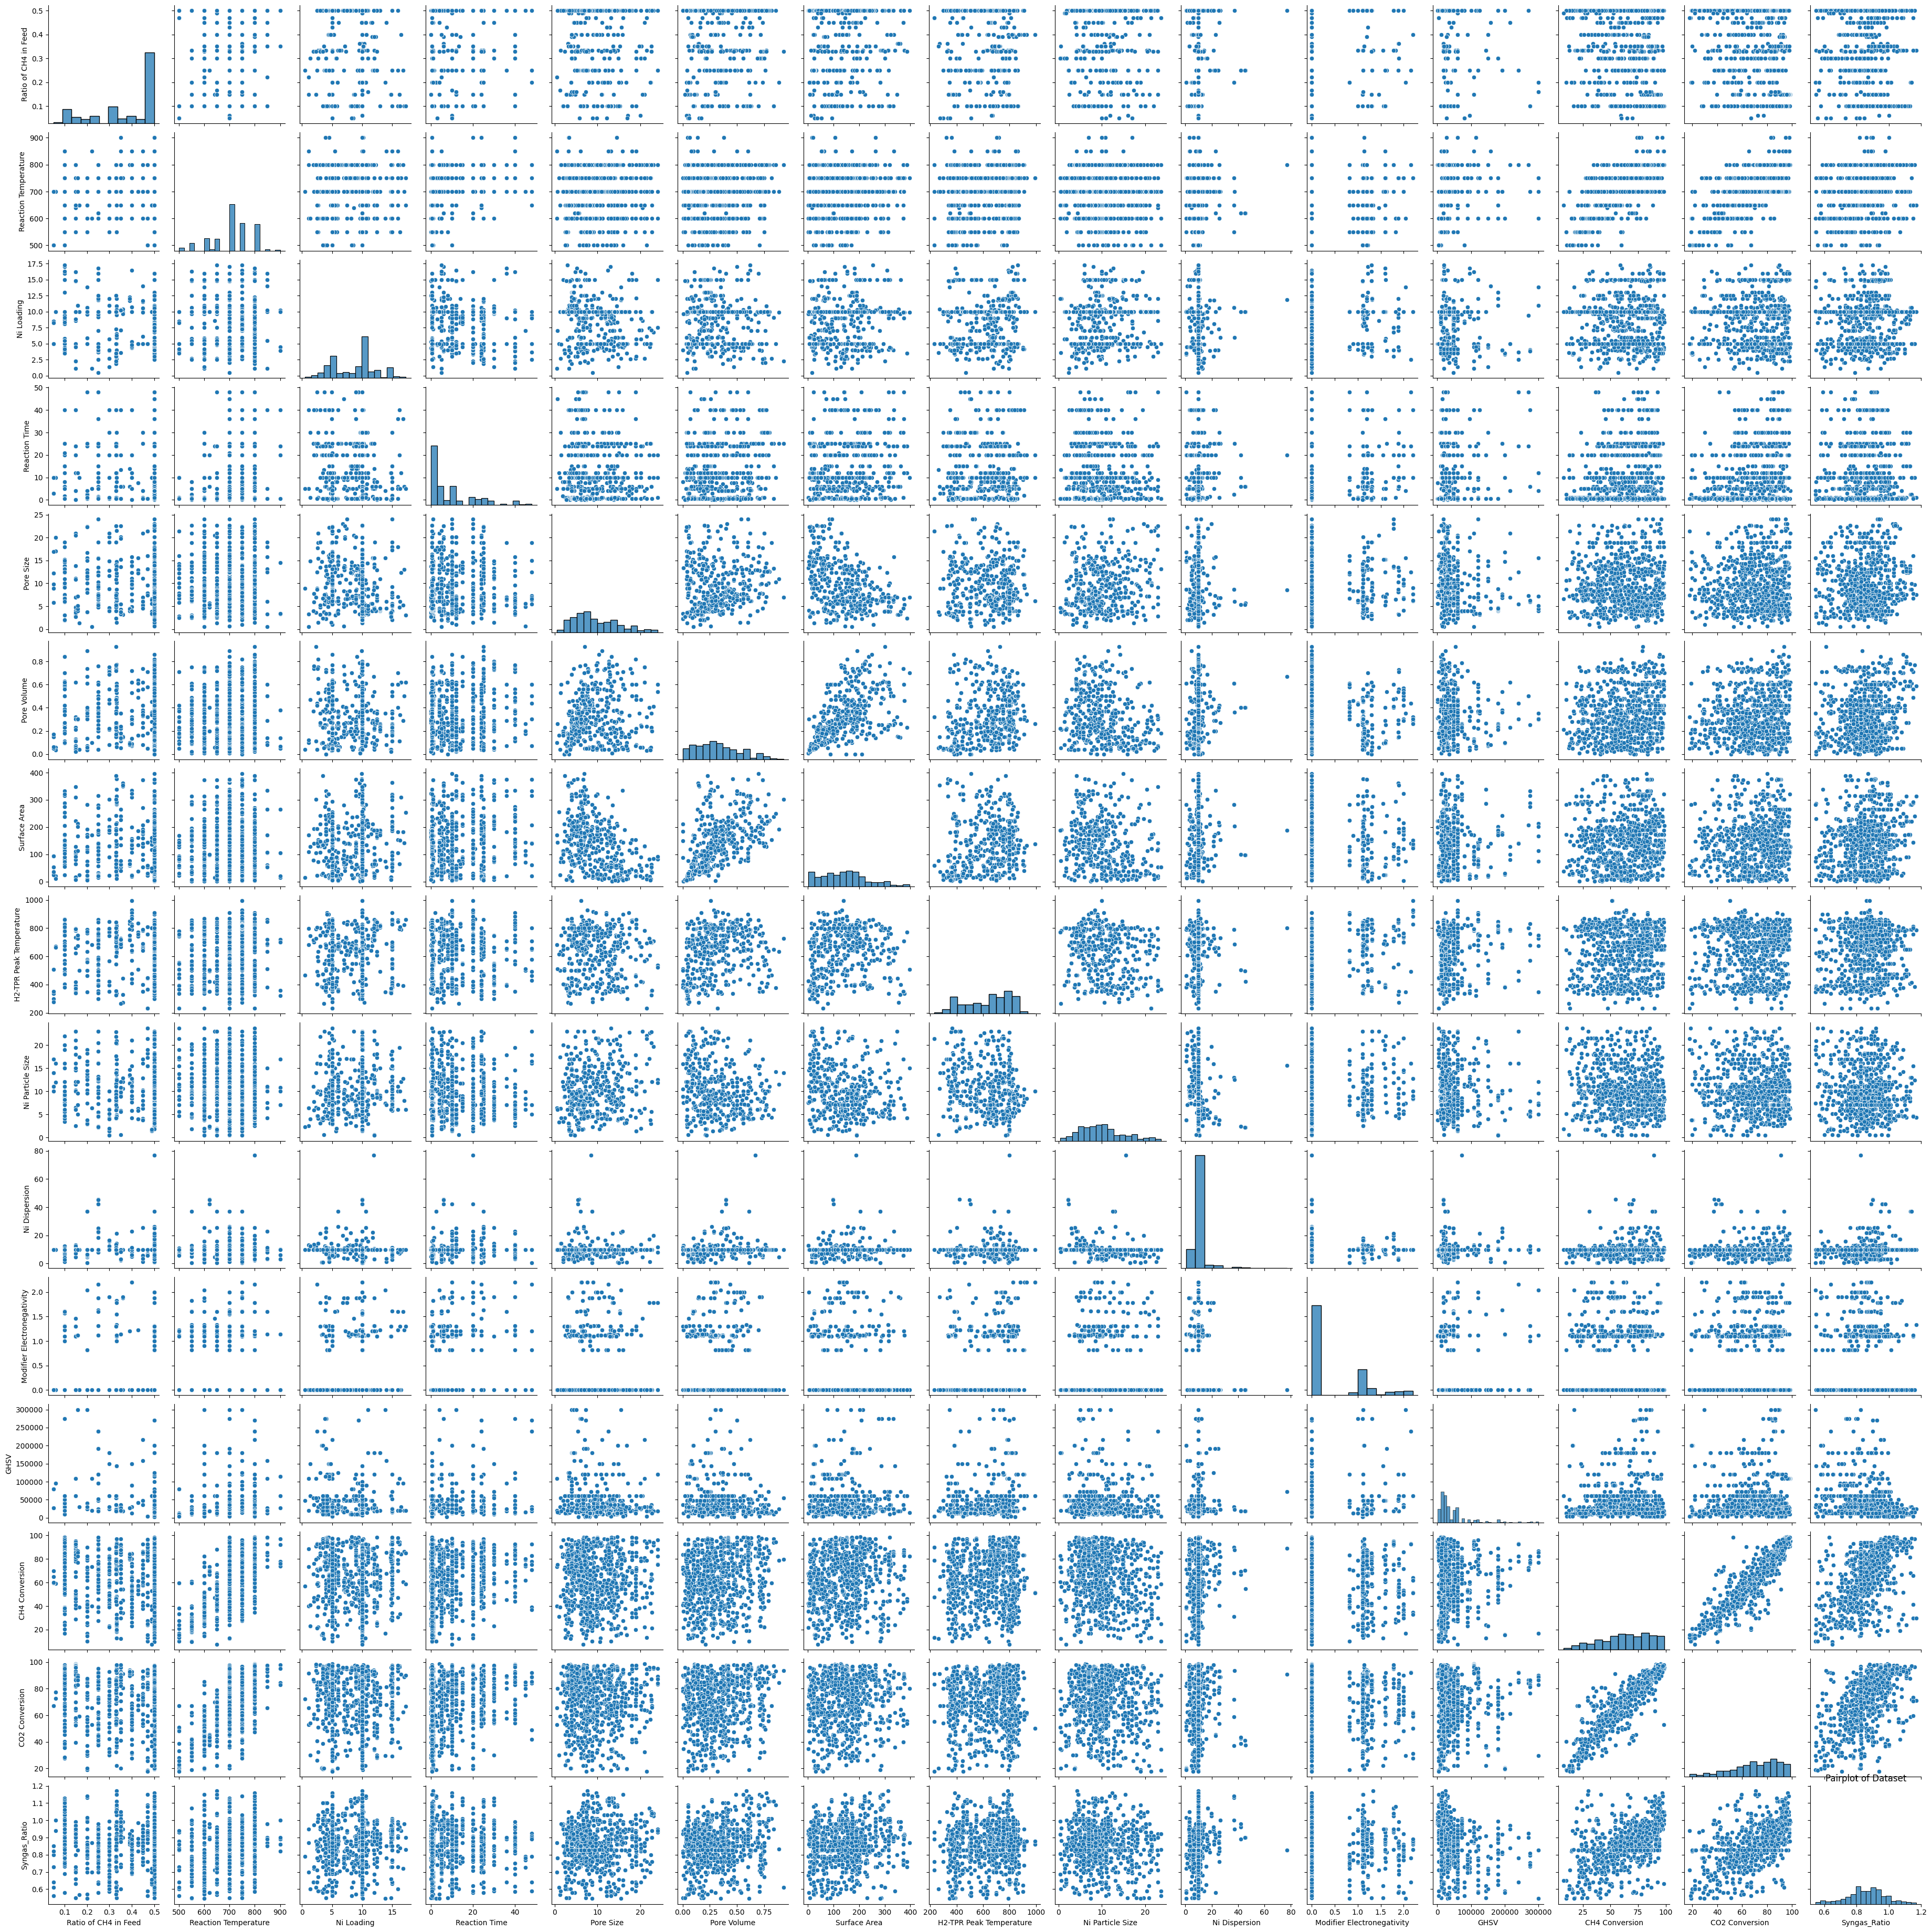

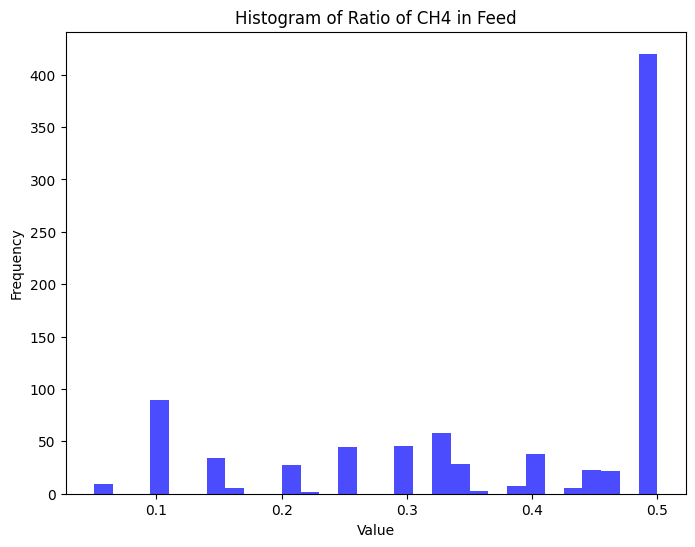

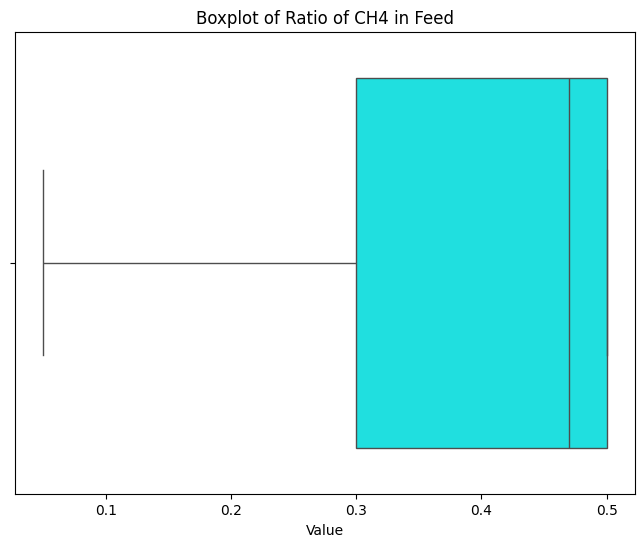

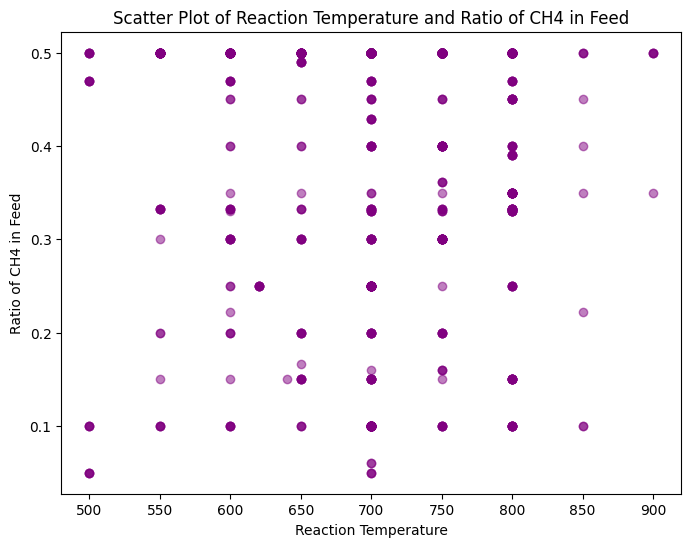

In [34]:
# display summary stats
summary_statistics = df.describe()
print(summary_statistics)

# assuming df_encoded is your dataset after one-hot encoding
encoded_columns = [col for col in df_encoded.columns if col not in df.columns]

# print encoded columns to verify
print("One-hot ecnoded columns:")
print(encoded_columns)

# exclude one-hot encoded columns from the dataset
df_no_encoding = df_encoded.drop(columns=encoded_columns)

# alternatively, if you have the original dataframe before coding, just use df

import seaborn as sns
import matplotlib.pyplot as plt

# plot HEATMAP excluding one-hot encoded columns for correlation analysis
plt.figure(figsize=(12,10))
sns.heatmap(df_no_encoding.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix (Excluding One-Hot Encoded Data)')
plt.show()

# plot a PAIRPLOT to visualize relationships between variables
sns.pairplot(df)
plt.title('Pairplot of Dataset')
plt.show()

# Histograms

import matplotlib.pyplot as plt

# plotting a histogram for specific numeric column
# change 'your_numeric_column' to the name of the column you wish to plot histogram for
plt.figure(figsize=(8,6))
plt.hist(df['Ratio of CH4 in Feed'], bins=30, alpha=0.7, color='blue')
plt.title('Histogram of Ratio of CH4 in Feed')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Box Plot
import seaborn as sns

# plotting a box plot for a specific numeric column
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Ratio of CH4 in Feed'], color='cyan')
plt.title('Boxplot of Ratio of CH4 in Feed')
plt.xlabel('Value')
plt.show()

# Scatter Plot
# plotting for 2 numeric columns
plt.figure(figsize=(8,6))
plt.scatter(df['Reaction Temperature'], df['Ratio of CH4 in Feed'], alpha=0.5, color='purple')
plt.title('Scatter Plot of Reaction Temperature and Ratio of CH4 in Feed')
plt.xlabel('Reaction Temperature')
plt.ylabel('Ratio of CH4 in Feed')
plt.show()